In [1]:
#로이터 데이터셋 로드
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import reuters
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words = 10000)

In [2]:
#로이터 데이터 셋을 텍스트로 디코딩하기.
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])
# 0,1,2는 각각 패딩, 문서시작, 사전에 없음을 위해 예약되어있음.
decoded_newswire = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[0]])

In [3]:
import numpy as np
def vertorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i ,sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1
    return results

x_train = vertorize_sequences(train_data)
x_test = vertorize_sequences(test_data)

In [4]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [9]:
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer = "rmsprop", loss="categorical_crossentropy", metrics ="accuracy")

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]


history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
                   validation_data=(x_val, y_val))


Epoch 1/20
16/16 [==============================] - 2s 56ms/step - loss: 2.3666 - accuracy: 0.5312 - val_loss: 1.5024 - val_accuracy: 0.6470
Epoch 2/20
16/16 [==============================] - 1s 36ms/step - loss: 1.2634 - accuracy: 0.7216 - val_loss: 1.1735 - val_accuracy: 0.7430
Epoch 3/20
16/16 [==============================] - 1s 35ms/step - loss: 0.9490 - accuracy: 0.7942 - val_loss: 1.0290 - val_accuracy: 0.7790
Epoch 4/20
16/16 [==============================] - 1s 33ms/step - loss: 0.7519 - accuracy: 0.8330 - val_loss: 0.9635 - val_accuracy: 0.7910
Epoch 5/20
16/16 [==============================] - 1s 32ms/step - loss: 0.5869 - accuracy: 0.8732 - val_loss: 0.9170 - val_accuracy: 0.8130
Epoch 6/20
16/16 [==============================] - 1s 32ms/step - loss: 0.4649 - accuracy: 0.9022 - val_loss: 0.8814 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 1s 32ms/step - loss: 0.3703 - accuracy: 0.9211 - val_loss: 0.8533 - val_accuracy: 0.8180
Epoch 8/20
16

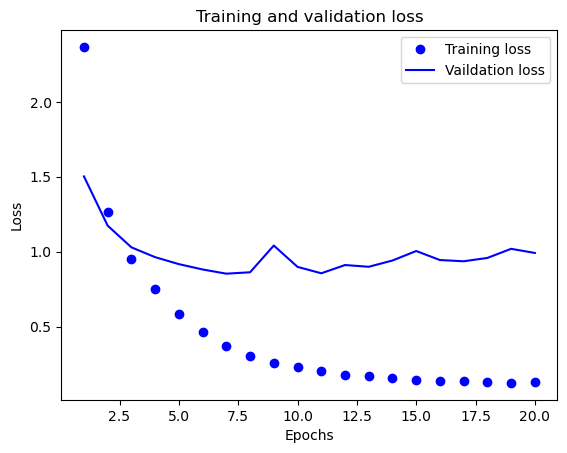

In [11]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Vaildation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()